## T03: Linear Regression

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# Set the random seed for reproducibility
np.random.seed(42)

## Estimating the variance of parameters

Recall the least squares problem for multiple linear regression
$$\hat{\beta} = \mathrm{argmin}_{\beta}||\mathbf{y} - \mathbf{X} \beta||_2^2.$$
The least squares estimate of $\beta$ is equivalent to the one obtained by maximizing the log-likelihood of data
$$\hat{\beta} = \mathrm{argmax}_{\beta}\ \mathcal{L}(\beta) = \mathrm{argmax}_{\beta}\ \log(p(\mathbf{y}|\mathbf{X})),\ \text{where}\ \mathbf{y}|\mathbf{X}\sim\mathcal{N}(\mathbf{X} \beta,\sigma_e^2\mathbf{I})$$
$$\iff \hat{\beta} = \mathrm{argmax}_{\beta}\ - \frac{n}{2} \log \sigma_e^2 - \frac{1}{2\sigma_e^2}(\mathbf{y} - \mathbf{X} \beta)^T(\mathbf{y} - \mathbf{X} \beta).$$
The second approach is called the Maximum Likelihood Estimate (MLE). 
As demonstrated in the class, we can obtain the estimate of $\beta$ through either of the above objective funcions
$$\hat{\beta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}.$$
We can also estimate the variance of the residual errors
$$\hat{\sigma_e^2} = \mathrm{argmax}_{\sigma_e^2}\ \mathcal{L}(\sigma_e^2) = \frac{1}{n} (\mathbf{y} - \mathbf{X} \beta)^T(\mathbf{y} - \mathbf{X} \beta).$$
We can further modify this biased estimation
$$\hat{\sigma_e^2} = \frac{1}{n - p} (\mathbf{y} - \mathbf{X} \beta)^T(\mathbf{y} - \mathbf{X} \beta).$$
The MLE additionally provides the standard error estimates of $\hat{\beta}$ using the inverse of the observed Fisher information matrix.
$$\text{Var}(\hat{\beta}) = \mathcal{I}^{-1} = \left(- \frac{\partial^2 \mathcal{L}(\beta)}{\partial \beta^2}\right)^{-1} = \sigma_e^2(\mathbf{X}^T \mathbf{X})^{-1}.$$

In [2]:
import numpy as np
from scipy import stats

def lin_reg(X, y):
    n, p = X.shape  # Sample size and number of features
    
    X = np.column_stack((np.ones(n), X))  # Add intercept
    invK = np.linalg.inv(X.T @ X)  # Inverse of XTX
    beta = invK @ (X.T @ y)  # Estimate beta
    
    residual = y - X @ beta
    Rsq = 1 - np.sum(residual**2) / np.sum((y - np.mean(y))**2)  # R squared
    sig2 = np.sum(residual**2) / (n - p - 1)  # Residual variance estimate
    
    Sig_beta = sig2 * invK  # Variance of beta estimates
    se = np.sqrt(np.diag(Sig_beta))  # Standard error
    t = beta / se  # t-statistics
    pval = 2 * (1 - stats.t.cdf(np.abs(t), df=n - p - 1))  # p-values
    
    return {
        'beta': beta,
        'sig2': sig2,
        'se': se,
        't': t,
        'pval': pval,
        'Rsq': Rsq
    }

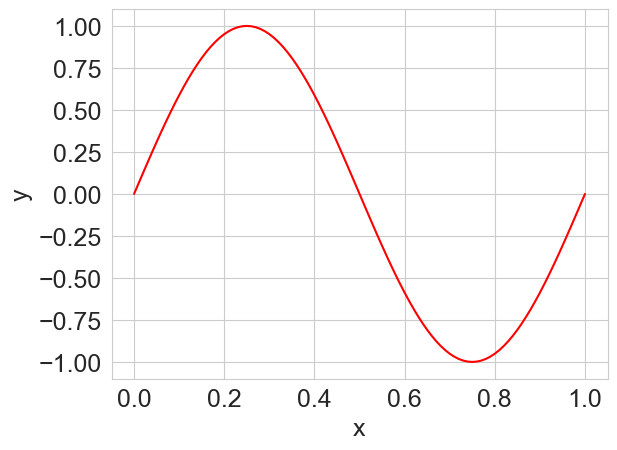

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 1.01, 0.01)
y = np.sin(2 * np.pi * x)

plt.plot(x, y, color='red', linewidth=1.5)
plt.ylabel("y")
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.gca().set_xlabel("x", fontsize=18)
plt.gca().set_ylabel("y", fontsize=18)
plt.show()

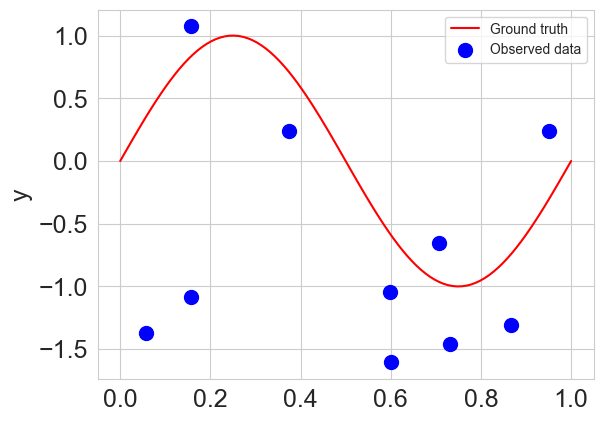

In [4]:
# Parameters
n = 10  # Sample size
X = np.random.uniform(0, 1, n)
y0 = np.sin(2 * np.pi * X)  # Ground truth
y = y0 + np.random.normal(0, 1, n)  # Observed data

# Data for the sine wave
x = np.linspace(0, 1, 100)
y_sin = np.sin(2 * np.pi * x)

# Plot
plt.plot(x, y_sin, color='red', linewidth=1.5, label='Ground truth')
plt.scatter(X, y, s=100, color='blue', label='Observed data')
plt.ylabel("y", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()

In [5]:
# Linear regression
result = lin_reg(X[:, None], y)
result

{'beta': array([-0.46958365, -0.43709376]),
 'sig2': 0.9014688646280514,
 'se': array([0.60145855, 1.00196315]),
 't': array([-0.78074151, -0.43623736]),
 'pval': array([0.45743234, 0.6741977 ]),
 'Rsq': 0.023235163864011366}

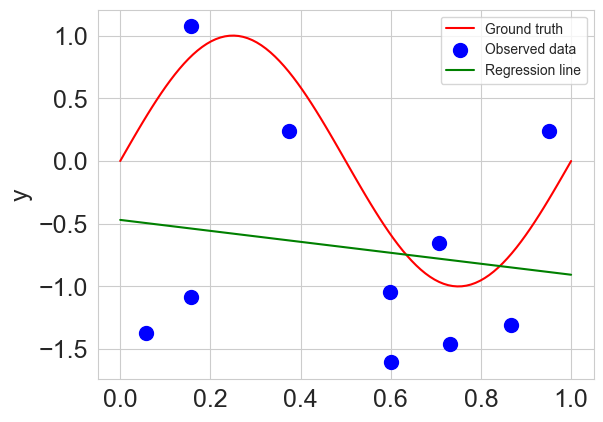

In [6]:
# Plot
plt.plot(x, y_sin, color='red', linewidth=1.5, label='Ground truth')
plt.scatter(X, y, s=100, color='blue', label='Observed data')
plt.plot(x, result['beta'][0] + result['beta'][1] * x, color='green', linewidth=1.5, label='Regression line')
plt.ylabel("y", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()

In [7]:
# Add x^2, x^3
X2 = np.column_stack((X, X**2, X**3))
result = lin_reg(X2, y)
result

{'beta': array([ -2.47705429,  23.6377922 , -58.35025199,  38.24279733]),
 'sig2': 0.5663160819654683,
 'se': array([ 1.13650635, 10.79686056, 24.03581032, 15.0962784 ]),
 't': array([-2.17953404,  2.18932087, -2.42763823,  2.53325994]),
 'pval': array([0.07210763, 0.07114136, 0.05132702, 0.04448356]),
 'Rsq': 0.5397864057980442}

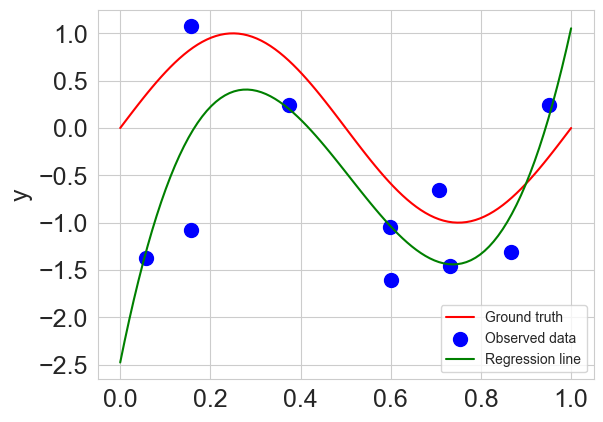

In [8]:
# Plot
plt.plot(x, y_sin, color='red', linewidth=1.5, label='Ground truth')
plt.scatter(X, y, s=100, color='blue', label='Observed data')
plt.plot(x, result['beta'][0] + result['beta'][1] * x + result['beta'][2] * x**2 + result['beta'][3] * x**3, color='green', linewidth=1.5, label='Regression line')
plt.ylabel("y", fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend()
plt.show()

## Use linear rgression to fit data in Python

REFERENCE: https://www.statlearning.com/

In [9]:
# pip install ISLP
from ISLP import load_data
Boston = load_data('Boston')

In [10]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


It contains the Boston data set, which records medv (median house value) for 506 neighborhoods around Boston. We will seek to predict medv using 13 predictors such as rm (average number of rooms per house), age (average age of houses), and lstat (percent of households with low socio economic status).

### Simple linear regression

In [11]:
import statsmodels.api as sm
# https://www.statsmodels.org/stable/index.html
X = Boston['lstat']
y = Boston['medv']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 26 Sep 2024   Prob (F-statistic):           5.08e-88
Time:                        18:36:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# Comparison: Scikit-learn
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = Boston['lstat'].values.reshape(-1, 1)
y = Boston['medv']
model.fit(X, y)
model.coef_, model.intercept_

(array([-0.95004935]), 34.5538408793831)

In [13]:
# Comparison: Our implementation
result = lin_reg(X, y)
result

{'beta': array([34.55384088, -0.95004935]),
 'sig2': 38.63567741731437,
 'se': array([0.56262735, 0.03873342]),
 't': array([ 61.41514552, -24.52789985]),
 'pval': array([0., 0.]),
 'Rsq': 0.5441462975864797}

## Prediction

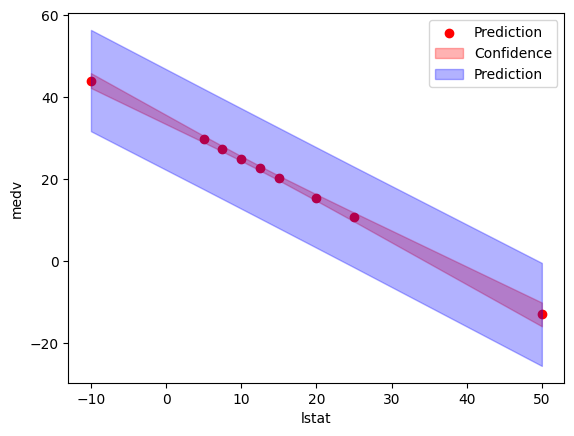

In [14]:
# Compare the prediction interval with the confidence interval
import statsmodels.stats.api as sms

X = Boston['lstat']
y = Boston['medv']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Prediction interval
X_pred = np.column_stack((np.ones(9), [-10, 5, 7.5, 10, 12.5, 15, 20, 25, 50]))
pred = model.get_prediction(X_pred)

# Confidence interval
conf = model.conf_int(alpha=0.05)

# Confidence interval: mean_ci_lower, mean_ci_upper, prediction interval: obs_ci_lower, obs_ci_upper
# The confidence interval is narrower than the prediction interval
# Plot
plt.scatter(X_pred[:, 1], pred.predicted_mean, color='red', label='Prediction')
plt.fill_between(X_pred[:, 1], pred.summary_frame()["mean_ci_lower"], pred.summary_frame()["mean_ci_upper"], color='red', alpha=0.3, label='Confidence')
plt.fill_between(X_pred[:, 1], pred.summary_frame()["obs_ci_lower"], pred.summary_frame()["obs_ci_upper"], color='blue', alpha=0.3, label='Prediction')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.legend()
plt.show()

- The prediction interval provides a broader interval than the confidence interval.
- What's the difference between the two options?

Recall that
$$y\sim\mathcal{N}(\mathbf{X}\beta,\sigma^2\mathbf{I}).$$

-  Given a new data $\mathbf{X}_{new}$, the mean predicted value is $\mathbb{E}(y|\mathbf{X}_{new})=\hat{y}=\mathbf{X}_{new}\hat{\beta}$. Here the uncertainty comes from $\hat{\beta}$, which is an estimate. Therefore, $$\text{Var}(\hat{y})=\mathbf{X}_i^T \text{Cov} (\hat{\beta})\mathbf{X}_i,\ \ \text{se}(\hat{y})=\sqrt{var(\hat{y})},$$
which corresponds to the `"confidence"` option. Known as the __confidence interval for the mean of $y$__.

- __Confidence interval tells you about how well you have determined the mean__.


- On the other hand, the population variance in $y$ is captured by the term $\sigma^2$. This leads to the other part of uncertainty and a larger "prediction" interval, which corresponds to the `"prediction"` option. Unlike the confidence interval of mean, this is the prediction interval for a __new samle $y$__. 

- __Prediction interval tells you where you can expect to see the next data point sampled__.


- Prediction interval is always larger than the confidence interval

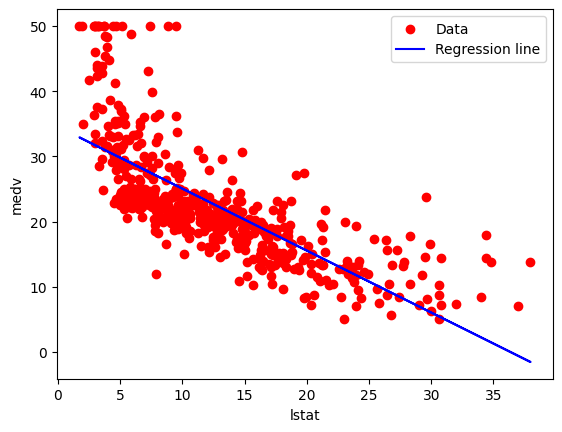

In [15]:
# Plot of original data and the regression line
plt.scatter(Boston['lstat'], Boston['medv'], color='red', label='Data')
plt.plot(Boston['lstat'], model.predict(X), color='blue', label='Regression line')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.legend()

## Diagnostics

As we can observe, there is some evidence for non-linearity in the relationship between `lstat` and `medv`.
We can examine some diagnostics plots.

In the following first we present [a base code](https://www.statsmodels.org/dev/examples/notebooks/generated/linear_regression_diagnostics_plots.html) that we will later use to generate following diagnostic plots:

In [20]:
import statsmodels
import numpy as np
import seaborn as sns
from statsmodels.tools.tools import maybe_unwrap_results
from statsmodels.graphics.gofplots import ProbPlot
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from typing import Type
import pandas as pd

style_talk = 'seaborn-talk'    #refer to plt.style.available

class LinearRegDiagnostic():
    """
    Diagnostic plots to identify potential problems in a linear regression fit.
    Mainly,
        a. non-linearity of data
        b. Correlation of error terms
        c. non-constant variance
        d. outliers
        e. high-leverage points
        f. collinearity

    Authors:
        Prajwal Kafle (p33ajkafle@gmail.com, where 3 = r)
        Does not come with any sort of warranty.
        Please test the code one your end before using.

        Matt Spinelli (m3spinelli@gmail.com, where 3 = r)
        (1) Fixed incorrect annotation of the top most extreme residuals in
            the Residuals vs Fitted and, especially, the Normal Q-Q plots.
        (2) Changed Residuals vs Leverage plot to match closer the y-axis
            range shown in the equivalent plot in the R package ggfortify.
        (3) Added horizontal line at y=0 in Residuals vs Leverage plot to
            match the plots in R package ggfortify and base R.
        (4) Added option for placing a vertical guideline on the Residuals
            vs Leverage plot using the rule of thumb of h = 2p/n to denote
            high leverage (high_leverage_threshold=True).
        (5) Added two more ways to compute the Cook's Distance (D) threshold:
            * 'baseR': D > 1 and D > 0.5 (default)
            * 'convention': D > 4/n
            * 'dof': D > 4 / (n - k - 1)
        (6) Fixed class name to conform to Pascal casing convention
        (7) Fixed Residuals vs Leverage legend to work with loc='best'
    """

    def __init__(self,
                 results: Type[statsmodels.regression.linear_model.RegressionResultsWrapper]) -> None:
        """
        For a linear regression model, generates following diagnostic plots:

        a. residual
        b. qq
        c. scale location and
        d. leverage

        and a table

        e. vif

        Args:
            results (Type[statsmodels.regression.linear_model.RegressionResultsWrapper]):
                must be instance of statsmodels.regression.linear_model object

        Raises:
            TypeError: if instance does not belong to above object

        Example:
        >>> import numpy as np
        >>> import pandas as pd
        >>> import statsmodels.formula.api as smf
        >>> x = np.linspace(-np.pi, np.pi, 100)
        >>> y = 3*x + 8 + np.random.normal(0,1, 100)
        >>> df = pd.DataFrame({'x':x, 'y':y})
        >>> res = smf.ols(formula= "y ~ x", data=df).fit()
        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls(plot_context="seaborn-v0_8-paper")

        In case you do not need all plots you can also independently make an individual plot/table
        in following ways

        >>> cls = Linear_Reg_Diagnostic(res)
        >>> cls.residual_plot()
        >>> cls.qq_plot()
        >>> cls.scale_location_plot()
        >>> cls.leverage_plot()
        >>> cls.vif_table()
        """

        if isinstance(results, statsmodels.regression.linear_model.RegressionResultsWrapper) is False:
            raise TypeError("result must be instance of statsmodels.regression.linear_model.RegressionResultsWrapper object")

        self.results = maybe_unwrap_results(results)

        self.y_true = self.results.model.endog
        self.y_predict = self.results.fittedvalues
        self.xvar = self.results.model.exog
        self.xvar_names = self.results.model.exog_names

        self.residual = np.array(self.results.resid)
        influence = self.results.get_influence()
        self.residual_norm = influence.resid_studentized_internal
        self.leverage = influence.hat_matrix_diag
        self.cooks_distance = influence.cooks_distance[0]
        self.nparams = len(self.results.params)
        self.nresids = len(self.residual_norm)

    def __call__(self, plot_context='seaborn-v0_8-paper', **kwargs):
        # print(plt.style.available)
        with plt.style.context(plot_context):
            fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
            self.residual_plot(ax=ax[0,0])
            self.qq_plot(ax=ax[0,1])
            self.scale_location_plot(ax=ax[1,0])
            self.leverage_plot(
                ax=ax[1,1],
                high_leverage_threshold = kwargs.get('high_leverage_threshold'),
                cooks_threshold = kwargs.get('cooks_threshold'))
            plt.show()

        return self.vif_table(), fig, ax,

    def residual_plot(self, ax=None):
        """
        Residual vs Fitted Plot

        Graphical tool to identify non-linearity.
        (Roughly) Horizontal red line is an indicator that the residual has a linear pattern
        """
        if ax is None:
            fig, ax = plt.subplots()

        sns.residplot(
            x=self.y_predict,
            y=self.residual,
            lowess=True,
            scatter_kws={'alpha': 0.5},
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        residual_abs = np.abs(self.residual)
        abs_resid = np.flip(np.argsort(residual_abs), 0)
        abs_resid_top_3 = abs_resid[:3]
        for i in abs_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], self.residual[i]),
                color='C3')

        ax.set_title('Residuals vs Fitted', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel('Residuals')
        return ax

    def qq_plot(self, ax=None):
        """
        Standarized Residual vs Theoretical Quantile plot

        Used to visually check if residuals are normally distributed.
        Points spread along the diagonal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        QQ = ProbPlot(self.residual_norm)
        fig = QQ.qqplot(line='45', alpha=0.5, lw=1, ax=ax)

        # annotations
        abs_norm_resid = np.flip(np.argsort(np.abs(self.residual_norm)), 0)
        abs_norm_resid_top_3 = abs_norm_resid[:3]
        for i, x, y in self.__qq_top_resid(QQ.theoretical_quantiles, abs_norm_resid_top_3):
            ax.annotate(
                i,
                xy=(x, y),
                ha='right',
                color='C3')

        ax.set_title('Normal Q-Q', fontweight="bold")
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Standardized Residuals')
        return ax

    def scale_location_plot(self, ax=None):
        """
        Sqrt(Standarized Residual) vs Fitted values plot

        Used to check homoscedasticity of the residuals.
        Horizontal line will suggest so.
        """
        if ax is None:
            fig, ax = plt.subplots()

        residual_norm_abs_sqrt = np.sqrt(np.abs(self.residual_norm))

        ax.scatter(self.y_predict, residual_norm_abs_sqrt, alpha=0.5);
        sns.regplot(
            x=self.y_predict,
            y=residual_norm_abs_sqrt,
            scatter=False, ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        abs_sq_norm_resid = np.flip(np.argsort(residual_norm_abs_sqrt), 0)
        abs_sq_norm_resid_top_3 = abs_sq_norm_resid[:3]
        for i in abs_sq_norm_resid_top_3:
            ax.annotate(
                i,
                xy=(self.y_predict[i], residual_norm_abs_sqrt[i]),
                color='C3')

        ax.set_title('Scale-Location', fontweight="bold")
        ax.set_xlabel('Fitted values')
        ax.set_ylabel(r'$\sqrt{|\mathrm{Standardized\ Residuals}|}$');
        return ax

    def leverage_plot(self, ax=None, high_leverage_threshold=False, cooks_threshold='baseR'):
        """
        Residual vs Leverage plot

        Points falling outside Cook's distance curves are considered observation that can sway the fit
        aka are influential.
        Good to have none outside the curves.
        """
        if ax is None:
            fig, ax = plt.subplots()

        ax.scatter(
            self.leverage,
            self.residual_norm,
            alpha=0.5);

        sns.regplot(
            x=self.leverage,
            y=self.residual_norm,
            scatter=False,
            ci=False,
            lowess=True,
            line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8},
            ax=ax)

        # annotations
        leverage_top_3 = np.flip(np.argsort(self.cooks_distance), 0)[:3]
        for i in leverage_top_3:
            ax.annotate(
                i,
                xy=(self.leverage[i], self.residual_norm[i]),
                color = 'C3')

        factors = []
        if cooks_threshold == 'baseR' or cooks_threshold is None:
            factors = [1, 0.5]
        elif cooks_threshold == 'convention':
            factors = [4/self.nresids]
        elif cooks_threshold == 'dof':
            factors = [4/ (self.nresids - self.nparams)]
        else:
            raise ValueError("threshold_method must be one of the following: 'convention', 'dof', or 'baseR' (default)")
        for i, factor in enumerate(factors):
            label = "Cook's distance" if i == 0 else None
            xtemp, ytemp = self.__cooks_dist_line(factor)
            ax.plot(xtemp, ytemp, label=label, lw=1.25, ls='--', color='red')
            ax.plot(xtemp, np.negative(ytemp), lw=1.25, ls='--', color='red')

        if high_leverage_threshold:
            high_leverage = 2 * self.nparams / self.nresids
            if max(self.leverage) > high_leverage:
                ax.axvline(high_leverage, label='High leverage', ls='-.', color='purple', lw=1)

        ax.axhline(0, ls='dotted', color='black', lw=1.25)
        ax.set_xlim(0, max(self.leverage)+0.01)
        ax.set_ylim(min(self.residual_norm)-0.1, max(self.residual_norm)+0.1)
        ax.set_title('Residuals vs Leverage', fontweight="bold")
        ax.set_xlabel('Leverage')
        ax.set_ylabel('Standardized Residuals')
        plt.legend(loc='best')
        return ax

    def vif_table(self):
        """
        VIF table

        VIF, the variance inflation factor, is a measure of multicollinearity.
        VIF > 5 for a variable indicates that it is highly collinear with the
        other input variables.
        """
        vif_df = pd.DataFrame()
        vif_df["Features"] = self.xvar_names
        vif_df["VIF Factor"] = [variance_inflation_factor(self.xvar, i) for i in range(self.xvar.shape[1])]

        return (vif_df
                .sort_values("VIF Factor")
                .round(2))


    def __cooks_dist_line(self, factor):
        """
        Helper function for plotting Cook's distance curves
        """
        p = self.nparams
        formula = lambda x: np.sqrt((factor * p * (1 - x)) / x)
        x = np.linspace(0.001, max(self.leverage), 50)
        y = formula(x)
        return x, y


    def __qq_top_resid(self, quantiles, top_residual_indices):
        """
        Helper generator function yielding the index and coordinates
        """
        offset = 0
        quant_index = 0
        previous_is_negative = None
        for resid_index in top_residual_indices:
            y = self.residual_norm[resid_index]
            is_negative = y < 0
            if previous_is_negative == None or previous_is_negative == is_negative:
                offset += 1
            else:
                quant_index -= offset
            x = quantiles[quant_index] if is_negative else np.flip(quantiles, 0)[quant_index]
            quant_index += 1
            previous_is_negative = is_negative
            yield resid_index, x, y

In [21]:
import seaborn as sns

X = Boston['lstat']
y = Boston['medv']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Residuals
cls = LinearRegDiagnostic(model)

<Axes: title={'center': 'Residuals vs Fitted'}, xlabel='Fitted values', ylabel='Residuals'>

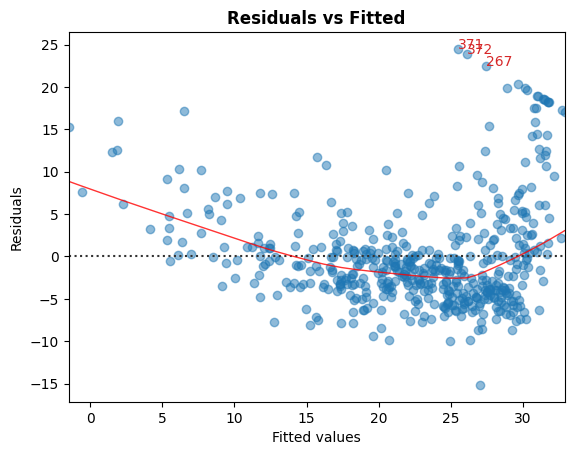

In [22]:
cls.residual_plot()

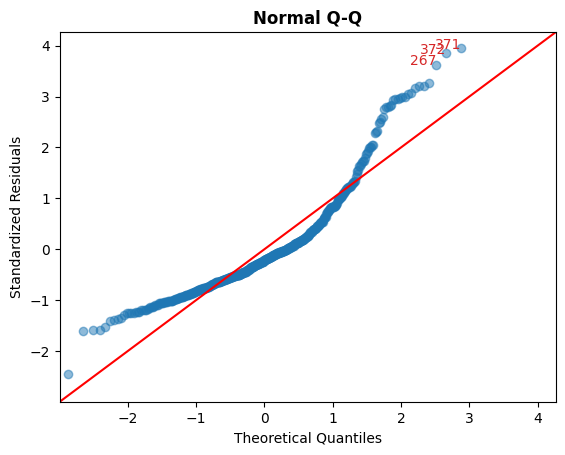

In [23]:
cls.qq_plot();

<Axes: title={'center': 'Scale-Location'}, xlabel='Fitted values', ylabel='$\\sqrt{|\\mathrm{Standardized\\ Residuals}|}$'>

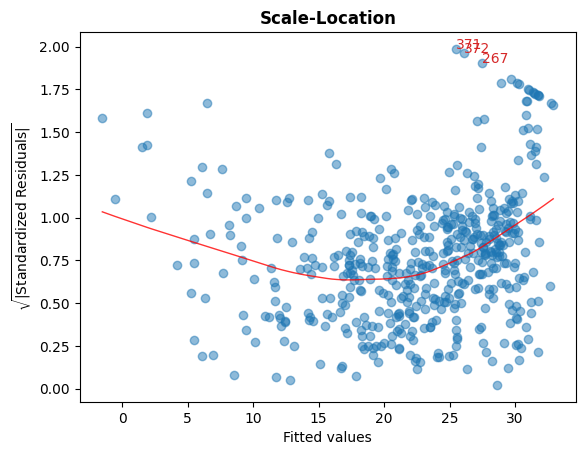

In [24]:
cls.scale_location_plot()

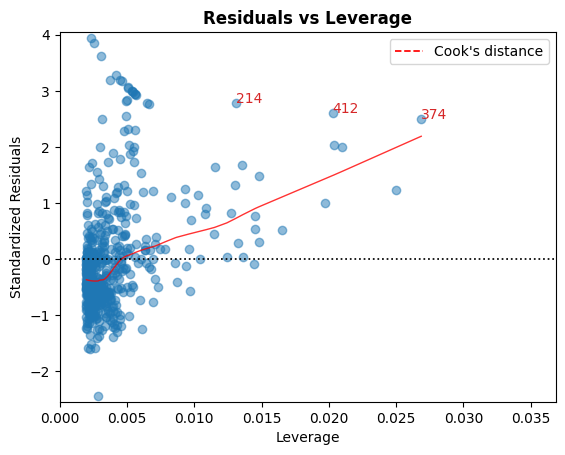

In [25]:
cls.leverage_plot();

From residual vs fitted plot, we can observe that the residuals are not randomly distributed around the 0 line. This indicates that the relationship between the response and predictor is not linear.

## Multiple linear regression

In [26]:
X = Boston.drop(columns='medv')

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     113.5
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          2.23e-133
Time:                        19:02:22   Log-Likelihood:                -1504.9
No. Observations:                 506   AIC:                             3036.
Df Residuals:                     493   BIC:                             3091.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.6173      4.936      8.431      0.000      31.919      51.316
crim          -0.1214      0.033     -3.678      0.000      -0.186      -0.057
zn             0.0470      0.014      3.384      0.001       0.020       0.074
indus          0.0135      0.062      0.217      0.829      -0.109       0.136
chas           2.8400      0.870      3.264      0.001       1.131       4.549
nox          -18.7580      3.851     -4.870      0.000     -26.325     -11.191
rm             3.6581      0.420      8.705      0.000       2.832       4.484
age            0.0036      0.013      0.271      0.787      -0.023       0.030
dis           -1.4908      0.202     -7.394      0.000      -1.887      -1.095
rad            0.2894      0.067      4.325      0.000       0.158       0.421
tax           -0.0127      0.004     -3.337      0.001      -0.020      -0.005
ptratio       -0.9375      0.132     -7.091      0.000      -1.197      -0.678
lstat         -0.5520      0.051    -10.897      0.000      -0.652      -0.452
==============================================================================
Omnibus:                      171.096   Durbin-Watson:                   1.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.937
Skew:                           1.477   Prob(JB):                    6.90e-155
Kurtosis:                       7.995   Cond. No.                     1.17e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.17e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Can we add other features to the model? e.g.
- Interaction terms
- Polynomial terms
- Transformation of features 

In [27]:
# Intereraction term
X = Boston[['lstat', 'age']]
X['lstat_age'] = X['lstat'] * X['age']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           4.86e-88
Time:                        19:02:27   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat_age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
# Polynomial transformation
X = Boston[['lstat']]
X['lstat2'] = X['lstat']**2

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          1.56e-112
Time:                        19:02:27   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         42.8620      0.872     49.149      0.000      41.149      44.575
lstat         -2.3328      0.124    -18.843      0.000      -2.576      -2.090
lstat2         0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Log transformation
X = Boston[['rm']]
X['rm'] = np.log(X['rm'])

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           1.22e-64
Time:                        19:02:28   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -76.4878      5.028    -15.213      0.000     -86.366     -66.610
rm            54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Exercise

In [30]:
# Load the data: Auto
Auto = load_data('Auto')

In [31]:
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


This question involves the use of simple linear regression on the `Auto` data set.

- Use the `sm.OLS()` function to perform a simple linear regression with `mpg` as the `response` and `horsepower` as the predictor. Use the `summary()` function to print the results. Answer the question:
    - Is there a relationship between the predictor and the response?
    - What is the predicted `mpg` associated with a `horsepower` of 98? What are the associated 95% confidence and prediction intervals?
- Use the `sm.OLS()` function to perform a multiple linear regression with `mpg` as the response and all other variables __except__ `name` as the predictors. Use the `summary()` function to print the results. Answer the question:
    - Is there a relationship between the predictors and the response?
    - Which predictors appear to have a statistically significant relationship to the response?
    - What does the coefficient for the `year` variable suggest?
- Fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?
- Try a few different transformations of the variables, such as $\log(x)$, $\sqrt{x}$, $x^2$. Comment on your findings.

In [32]:
# Solution

# Simple linear regression
X = Auto['horsepower']
y = Auto['mpg']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Fri, 20 Sep 2024   Prob (F-statistic):           7.03e-81
Time:                        19:02:29   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
# Except name
X = Auto.drop(columns=['mpg'])

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Fri, 20 Sep 2024   Prob (F-statistic):          2.04e-139
Time:                        19:02:30   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""